# Hacking with Fred day

## Goal
* Step 1: Detect 'objects' (for example: your cellphone) -> object detection from sendung mit der Maus

* Step 2: Show the last image of the object with a bounding box around the object. -> AWS Lambda function with S3 image storage. 


* Bonus step: augmented reality location retrieval. 

In [1]:
from PIL import Image
from imageai.Detection import ObjectDetection
import os
import cv2
import datetime
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Step 1: load the model

In [2]:

execution_path = os.getcwd()
model_path = os.path.join(execution_path, "yolo.h5")

if not os.path.exists(model_path):
    print("ERROR! Download the model from here: https://github.com/OlafenwaMoses/ImageAI/releases/download/1.0/yolo.h5")
    exit(-1)


# Create the object detection network
detector = ObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath(model_path)
detector.loadModel(detection_speed="faster")



Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## Step 2: get an image and detect object in this image

In [3]:
frame_bgr = cv2.imread("saved_images/bear-in-wohnzimmer.jpeg")
frame_rgb = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
frame_rgb = cv2.resize(frame_rgb, dsize=(640, 480))

output_image_rgb, detections = detector.detectObjectsFromImage(input_image=frame_rgb, input_type='array', output_type='array', minimum_percentage_probability=20)
output_image_bgr = cv2.cvtColor(output_image_rgb, cv2.COLOR_RGB2BGR)

for eachObject in detections: 
    print(eachObject["name"], eachObject["percentage_probability"])
    cv2.imwrite("saved_images/"+eachObject["name"]+".jpg", output_image_bgr)
    
h,w,c = output_image_bgr.shape

teddy bear 30.157020688056946
chair 56.1421275138855


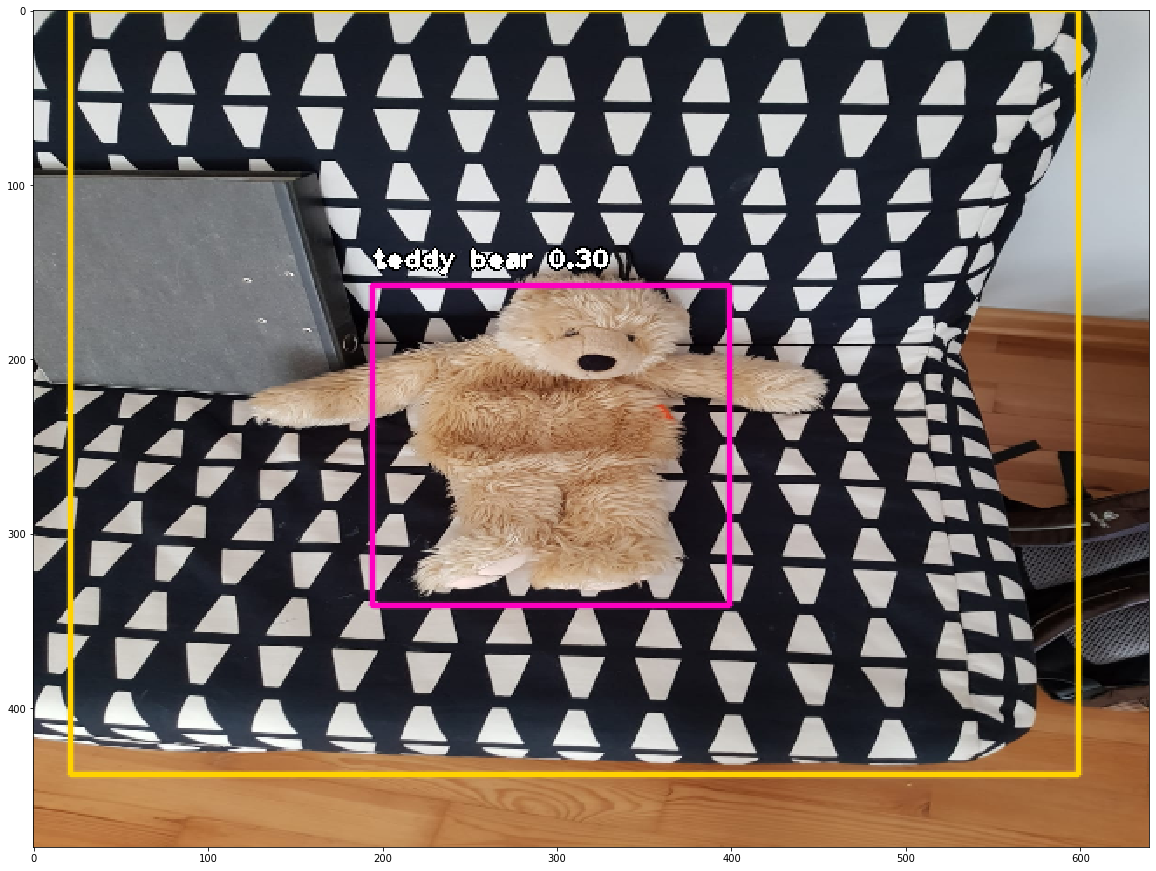

In [4]:
plt.figure(figsize=(20,20))
plt.imshow(output_image_rgb)

In [5]:
detections

[{'name': 'teddy bear',
  'percentage_probability': 30.157020688056946,
  'box_points': [194, 158, 399, 341]},
 {'name': 'chair',
  'percentage_probability': 56.1421275138855,
  'box_points': [21, 0, 599, 438]}]

Thank you, searching for chair


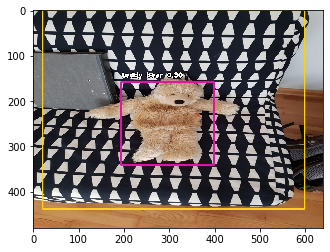

In [6]:
# query = input("Welcome to the search engine. What are you searching?")
query = "chair"
print("Thank you, searching for", query)
image_bgr = cv2.imread("saved_images/"+query+".jpg")
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

In [7]:
# import logging
# import boto3
# from botocore.exceptions import ClientError


# def upload_file(file_name, bucket, object_name=None):
#     """Upload a file to an S3 bucket

#     :param file_name: File to upload
#     :param bucket: Bucket to upload to
#     :param object_name: S3 object name. If not specified then file_name is used
#     :return: True if file was uploaded, else False
#     """

#     # If S3 object_name was not specified, use file_name
#     if object_name is None:
#         object_name = file_name

#     # Upload the file
#     s3_client = boto3.client('s3')
#     try:
#         response = s3_client.upload_file(file_name, bucket, object_name)
#     except ClientError as e:
#         logging.error(e)
#         return False
#     return True


In [8]:
#!pip3 install boto3


## Recognize the location (living room, bathroom)

Snippet provided by teachable machine

In [9]:
import tensorflow.keras
from PIL import Image, ImageOps
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = tensorflow.keras.models.load_model('teachable_machine/keras_model.h5')

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1.
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Load the class names as you would like to print this
class_names = list()
with open("teachable_machine/labels.txt") as f: 
    for line in f: 
        class_names.append(line.strip())

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
`normal` is a deprecated alias for `truncated_normal`


In [10]:
# Replace this with the path to your image
image = Image.open('saved_images/bear-in-wohnzimmer.jpeg')

#resize the image to a 224x224 with the same strategy as in TM2:
#resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

#turn the image into a numpy array
image_array = np.asarray(image)

# display the resized image
image.show()

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1

# Load the image into the array
data[0] = normalized_image_array

# run the inference
prediction = model.predict(data)
print(prediction)
print("Predicted this picture was taken in", 
      class_names[prediction[0].argmax()], 
      'with confidence', 
      prediction[0].max())



[[0.9026486 0.0008269 0.0965244]]
Predicted this picture was taken in 0 Wohnzimmer with confidence 0.9026486


## Another cool thing
* Upload and download images in the cloud
* Process an entire video
* Train a head on top of the detector to detect custom objects. 
* Use an actual webcam
